In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
house = pd.read_csv('california_housing_test.csv')

In [3]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [4]:
house.shape

(3000, 9)

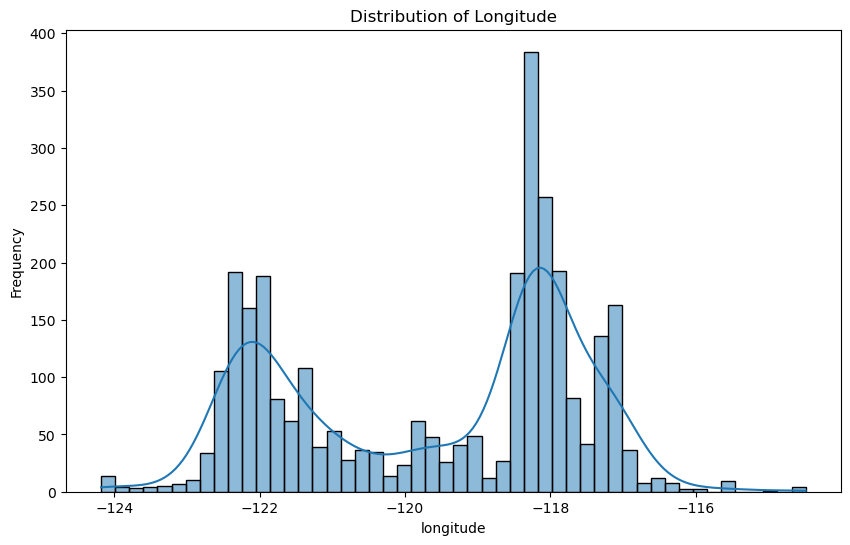

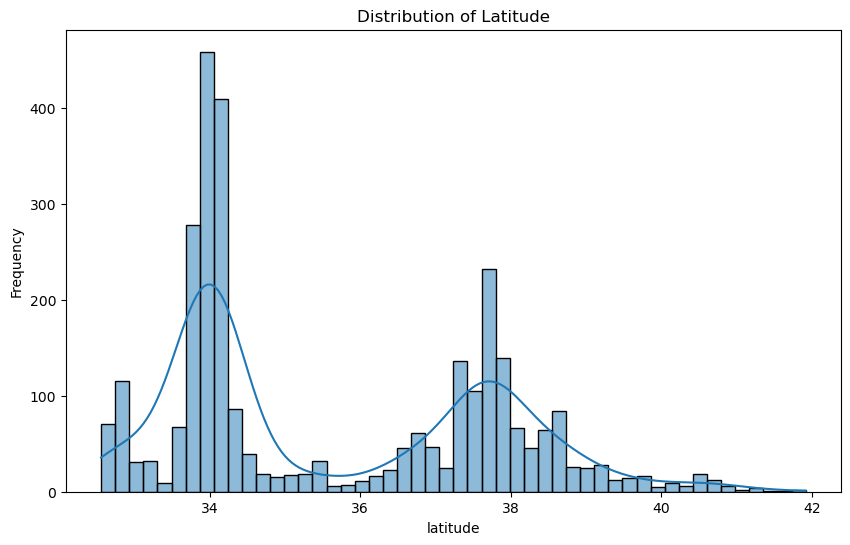

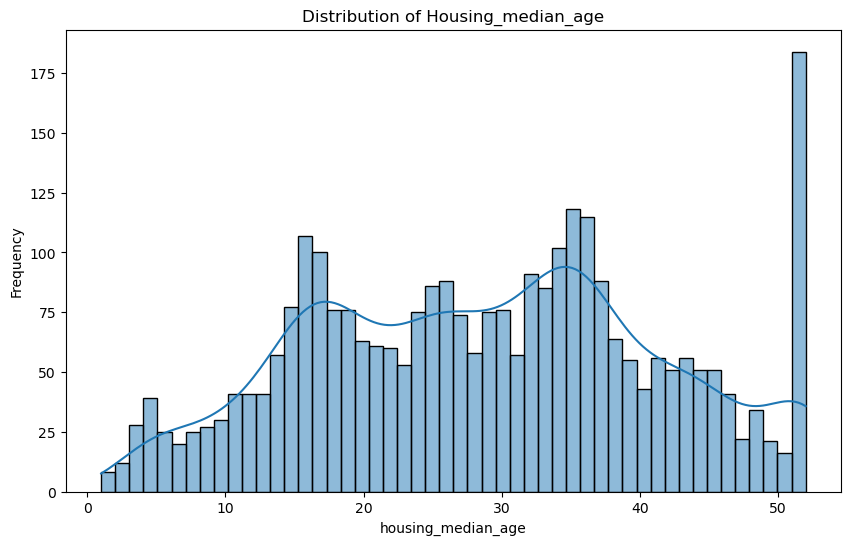

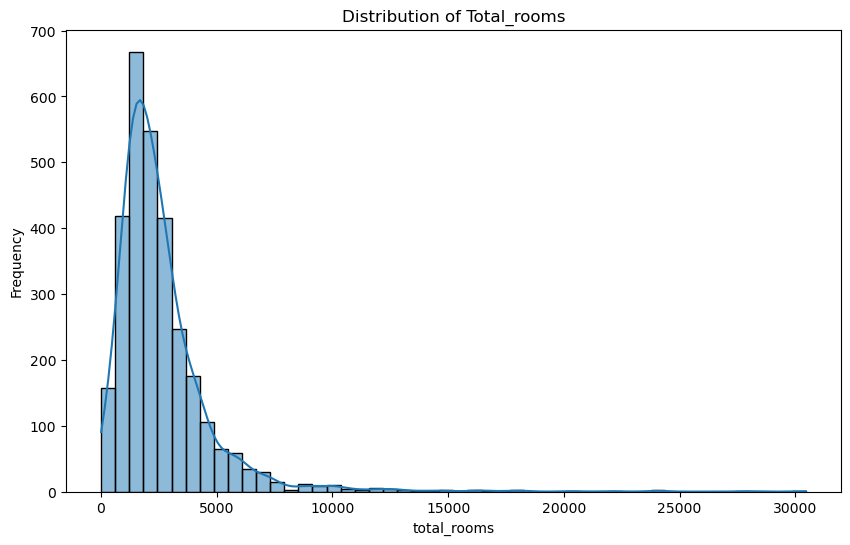

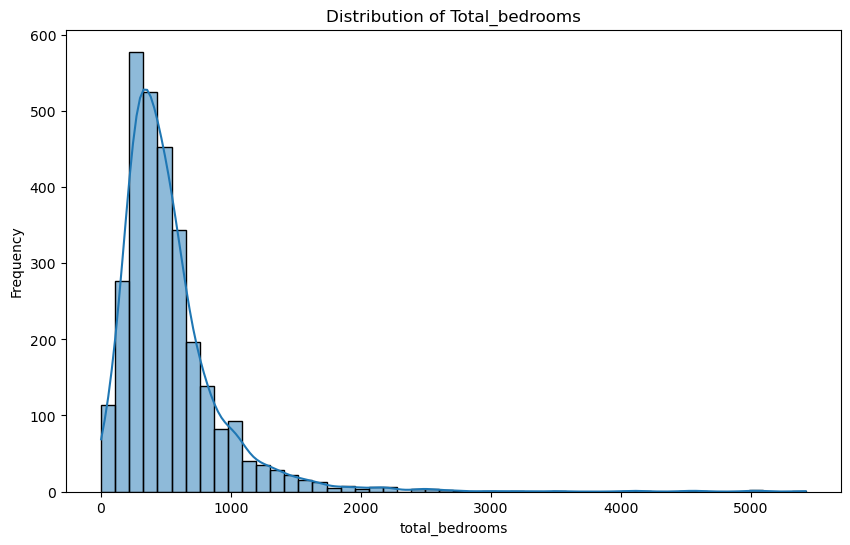

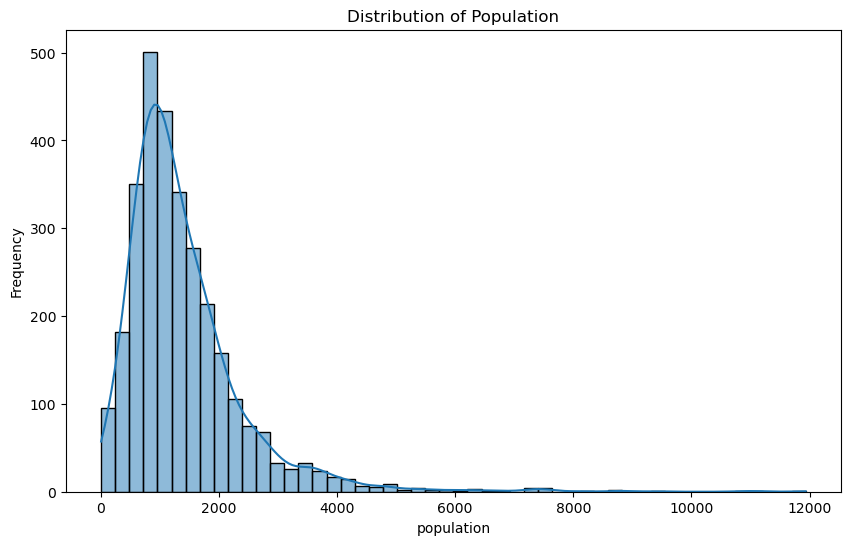

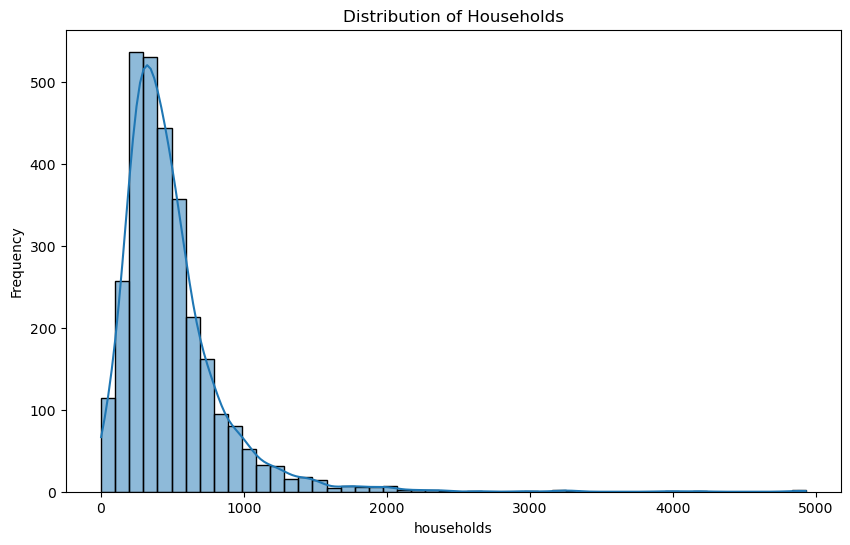

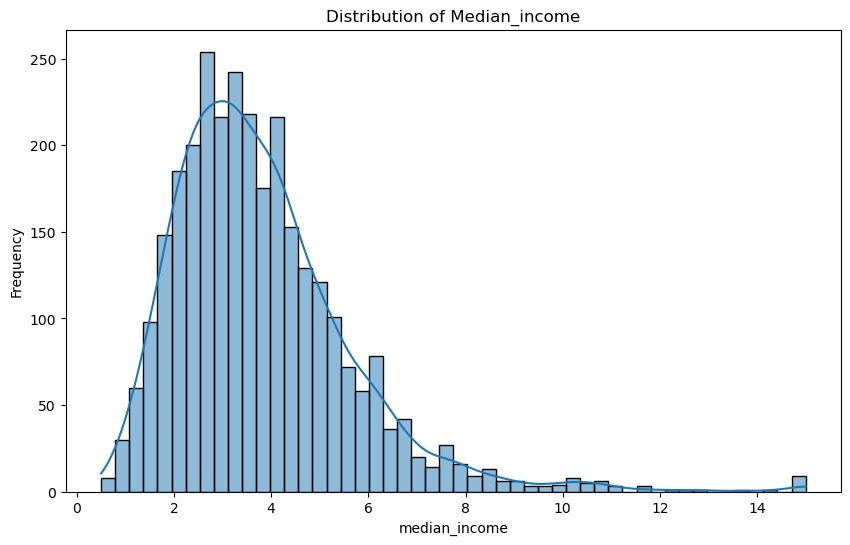

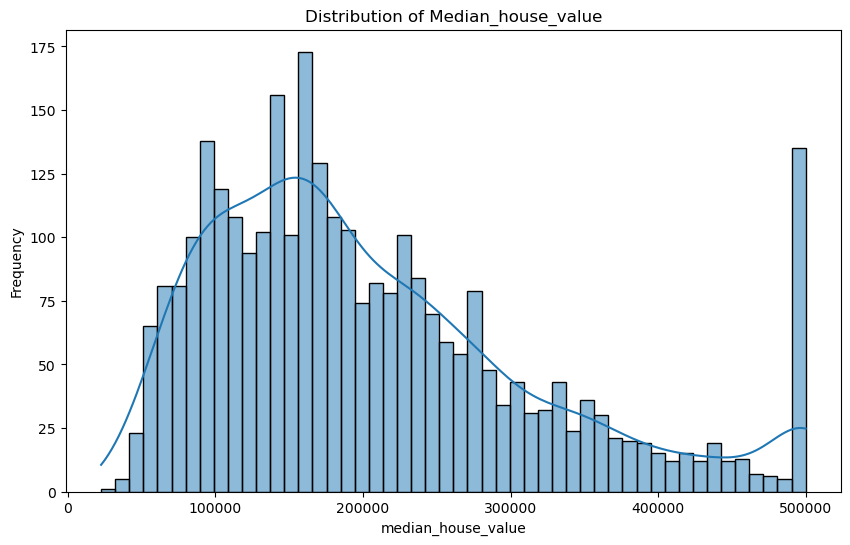

In [5]:
#  Return DF with the data type of each column.
cols = house.select_dtypes(include=['float64', 'i8']).columns

# kde - kernel density

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=house, x=col, bins = 50, kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

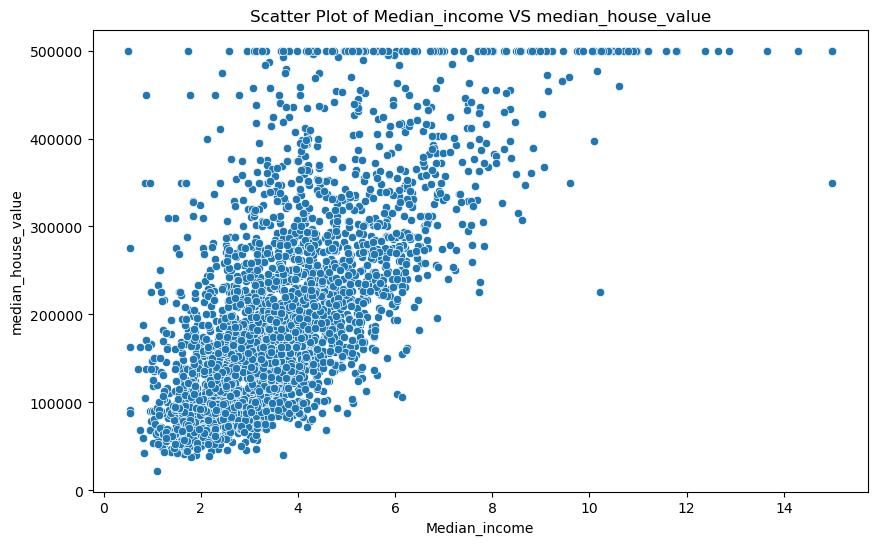

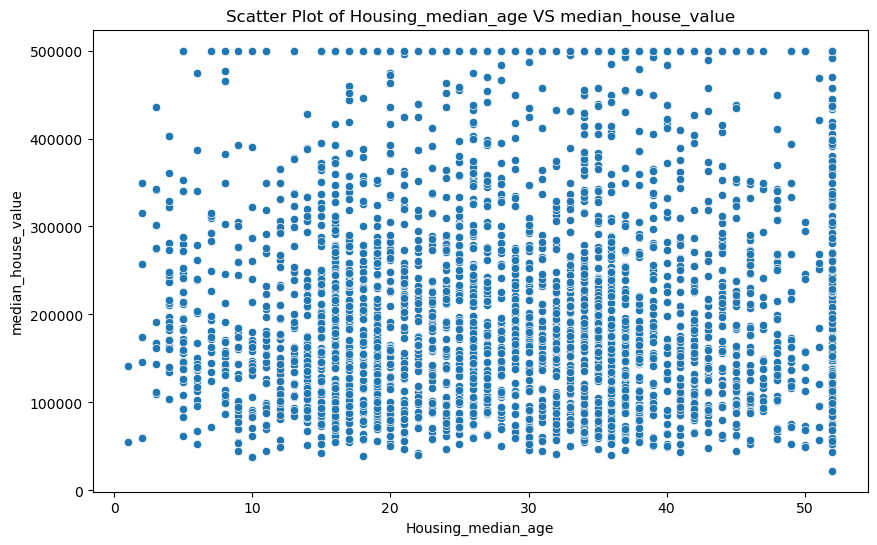

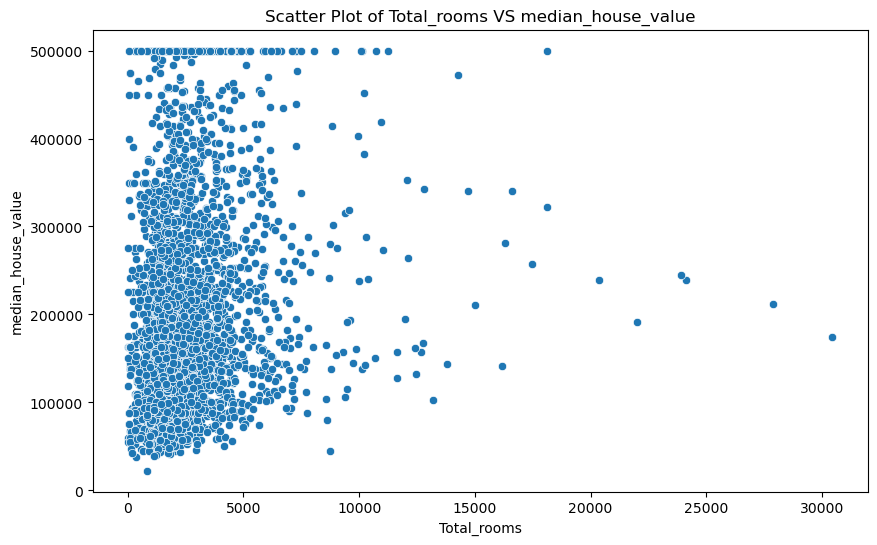

In [7]:
selected_features = [ 'median_income', 'housing_median_age', 'total_rooms']

for feature in selected_features :
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=house , x=feature, y='median_house_value')
    plt.title(f'Scatter Plot of {feature.capitalize()} VS median_house_value')
    plt.xlabel(feature.capitalize())
    plt.ylabel('median_house_value')
    plt.show()

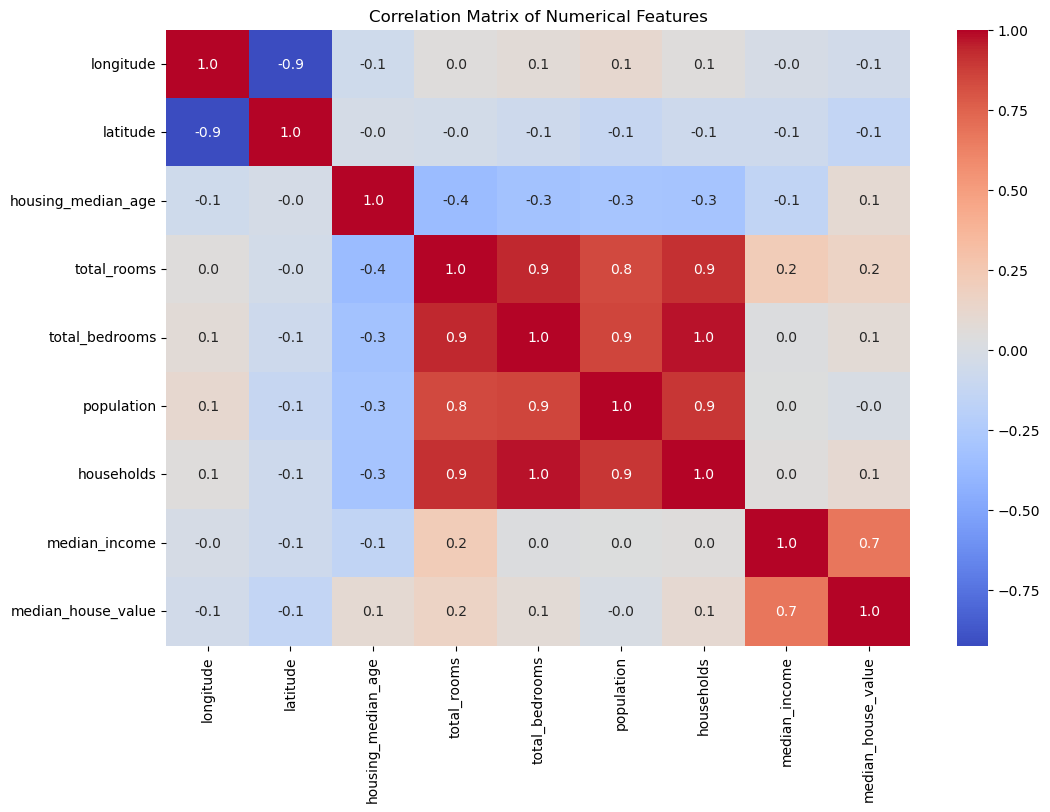

In [8]:
# 1 - correlated - both increase or decrease 
# -1 - non correlated - opposite in increasing & decline on will be increase other will be decline


# in diagonal means same columns belongs to same phase of correlation

plt.figure(figsize=(12, 8))
corr = house.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm' , fmt='.1f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [9]:
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins.

In [10]:
# Add a categroical col for visualization
house['House_value_category']=pd.cut(house['median_house_value'], 
                                  bins=[0, 100000, 200000, 300000, 400000, 500000, float('inf')], 
                                  labels=['<100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '>500k'])
house['House_value_category'].head()

0    300k-400k
1    100k-200k
2    200k-300k
3    300k-400k
4        <100k
Name: House_value_category, dtype: category
Categories (6, object): ['<100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '>500k']

In [11]:
house['House_value_category'].unique()

['300k-400k', '100k-200k', '200k-300k', '<100k', '400k-500k', '>500k']
Categories (6, object): ['<100k' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '>500k']

In [12]:
house['House_value_category'].value_counts()

House_value_category
100k-200k    1220
200k-300k     708
<100k         525
300k-400k     306
>500k         125
400k-500k     116
Name: count, dtype: int64

C:\Users\USER\AppData\Local\Temp\ipykernel_20028\1033422323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)


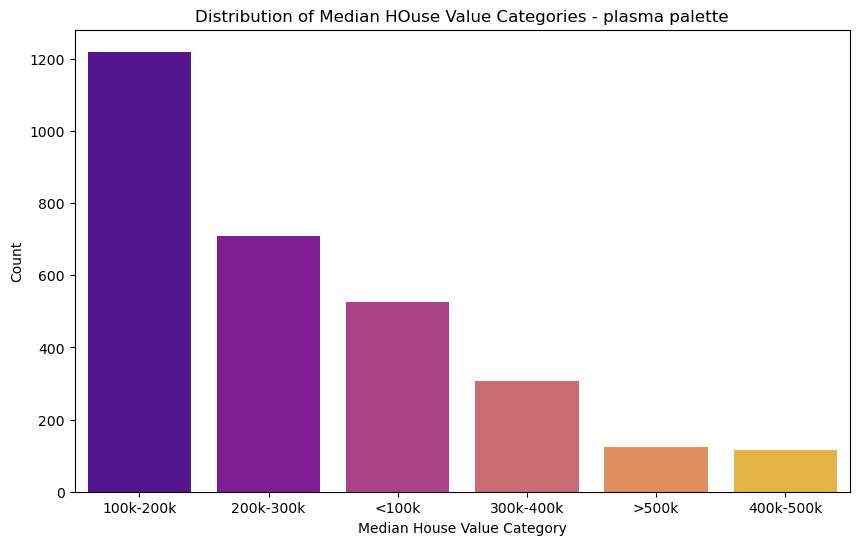

C:\Users\USER\AppData\Local\Temp\ipykernel_20028\1033422323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)


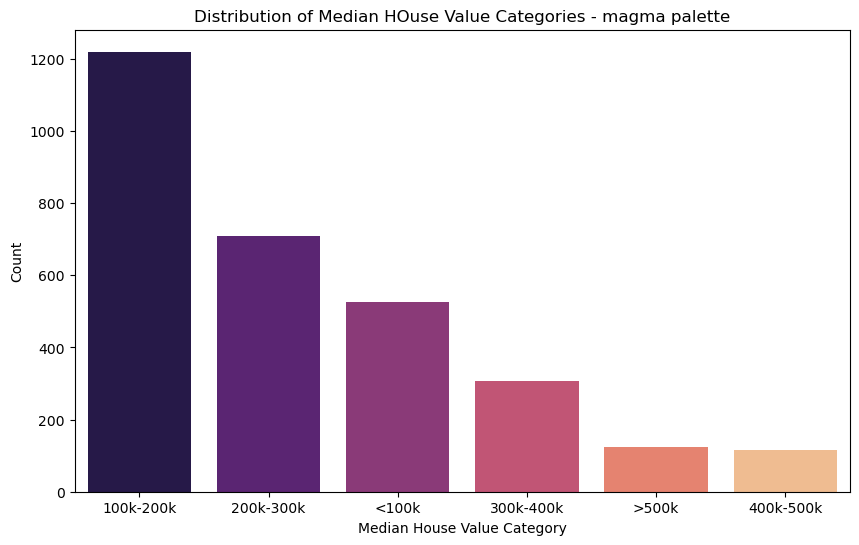

C:\Users\USER\AppData\Local\Temp\ipykernel_20028\1033422323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)


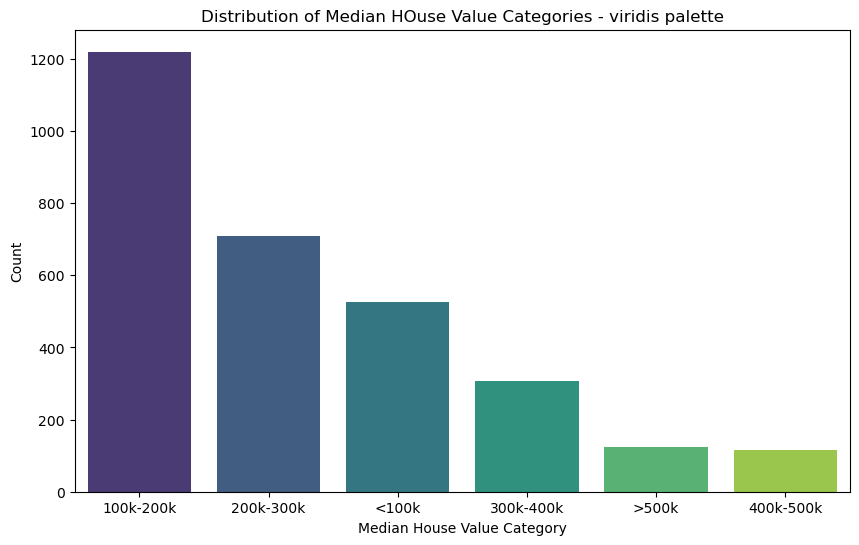

C:\Users\USER\AppData\Local\Temp\ipykernel_20028\1033422323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)


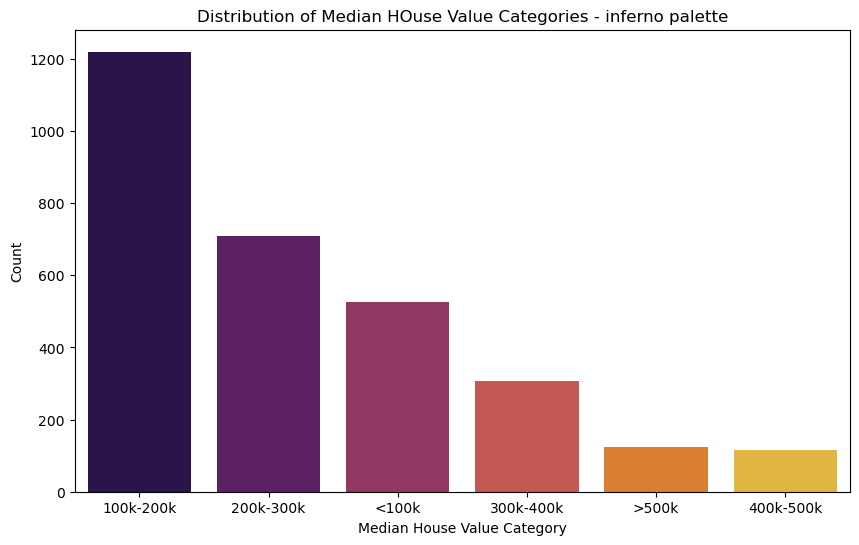

C:\Users\USER\AppData\Local\Temp\ipykernel_20028\1033422323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)


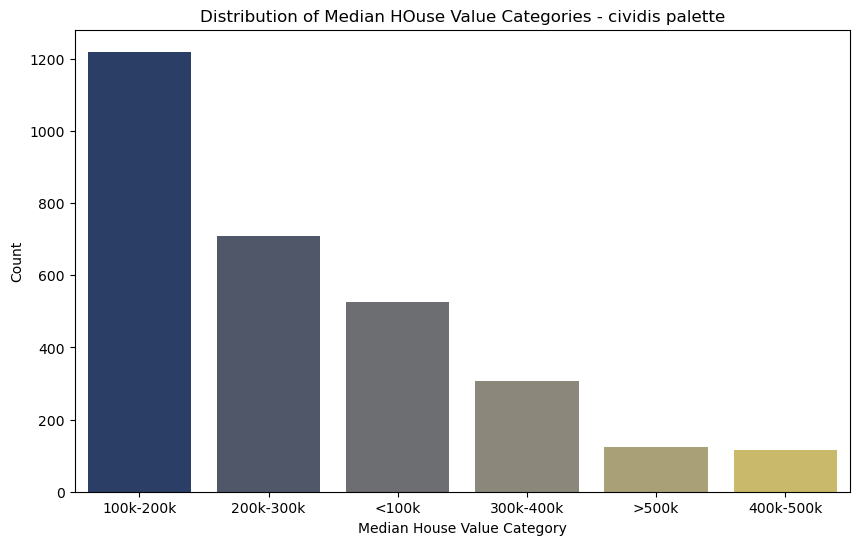

In [13]:
# Visualize the distribution of the House Value Categories 

palettes= ['plasma', 'magma', 'viridis', 'inferno', 'cividis']
for pal in palettes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=house, x='House_value_category', order=house['House_value_category'].value_counts().index, palette=pal)
    plt.title(f'Distribution of Median HOuse Value Categories - {pal} palette')
    plt.xlabel('Median House Value Category')
    plt.ylabel('Count')
    plt.show()


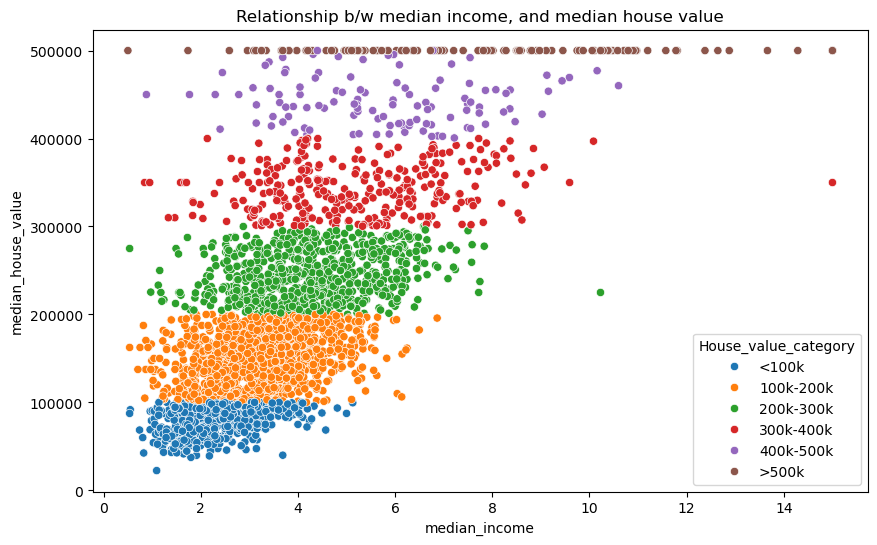

In [14]:
# Visualize the relationship b/w median income, and median house value, colored by house value category
plt.figure(figsize=(10,6))
sns.scatterplot(data=house, x='median_income', y='median_house_value', hue='House_value_category')
plt.title('Relationship b/w median income, and median house value')
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

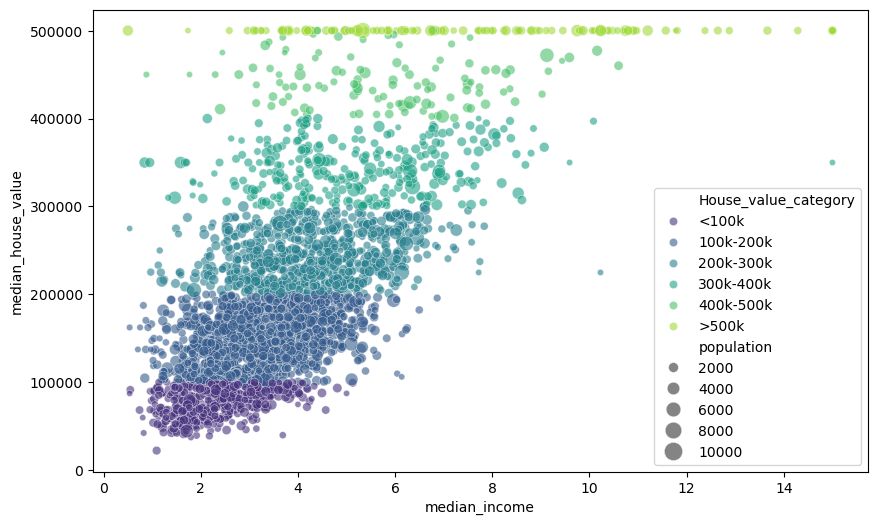

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=house, x='median_income', y='median_house_value', hue='House_value_category', size='population', alpha=0.6, sizes=(20, 200), palette='viridis')

In [16]:
corr = house[['median_income', 'median_house_value']].corr()
corr

,median_income,median_house_value
median_income,1.000000,0.672695
median_house_value,0.672695,1.000000


<Axes: >

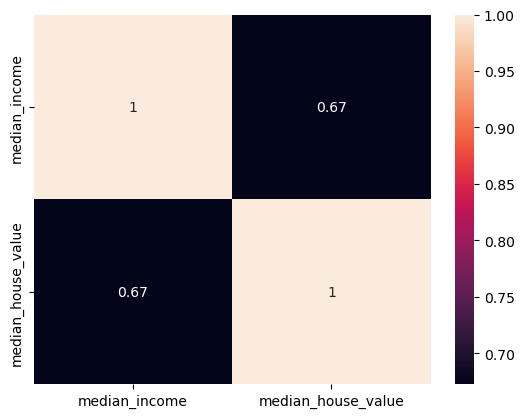

In [17]:
sns.heatmap(data=corr, annot=True)

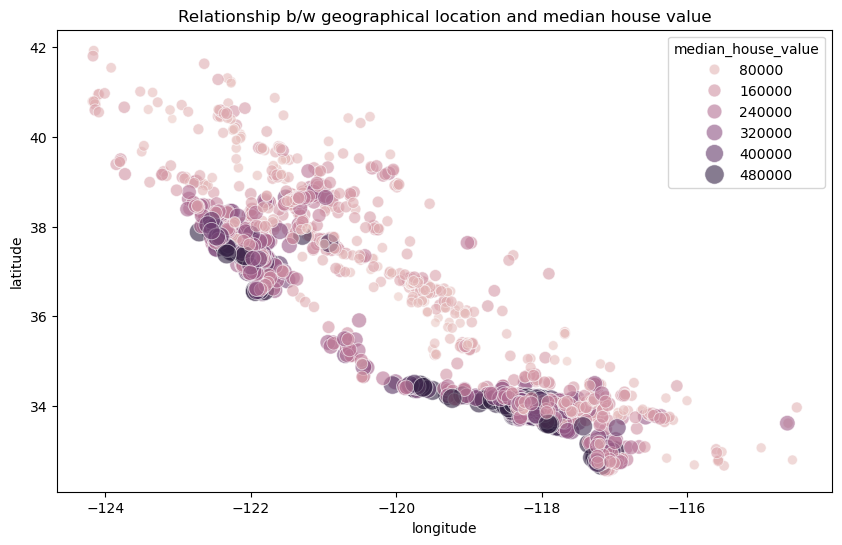

In [18]:
# Visualize the relationship b/w geographical location (longitude and latitude ) and median house value

plt.figure(figsize=(10, 6))
sns.scatterplot(data = house, x='longitude', y='latitude', hue='median_house_value', size='median_house_value', sizes=(40, 200), alpha=0.6)
plt.title('Relationship b/w geographical location and median house value')
plt.show() 

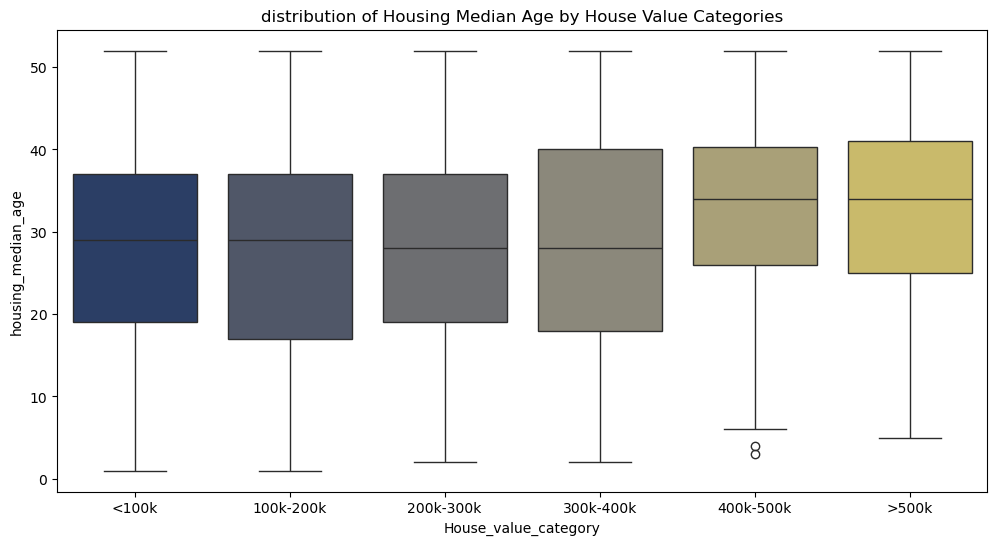

In [19]:
# Visualise distribution of housing median age by house value category using box plot

plt.figure(figsize=(12, 6))
sns.boxplot(data=house, y='housing_median_age', x='House_value_category', hue='House_value_category', palette='cividis')
plt.title('distribution of Housing Median Age by House Value Categories')
plt.show()

In [20]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'House_value_category'],
      dtype='object')

In [21]:
max_age=house['housing_median_age'].max()

bins = [i for i in range(0, 101, 5) if i<=max_age]
labels = []

for i in range(len(bins)-1):
    labels.append(f'{bins[i]}-{bins[i+1]}')

print(bins)
print(labels)

house['age_category']=pd.cut(house['housing_median_age'], bins=bins, labels=labels)
house['age_category'].unique()

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']


['25-30', '40-45', '15-20', '35-40', '10-15', ..., '45-50', NaN, '0-5', '20-25', '5-10']
Length: 11
Categories (10, object): ['0-5' < '5-10' < '10-15' < '15-20' ... '30-35' < '35-40' < '40-45' < '45-50']

In [22]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'House_value_category', 'age_category'],
      dtype='object')

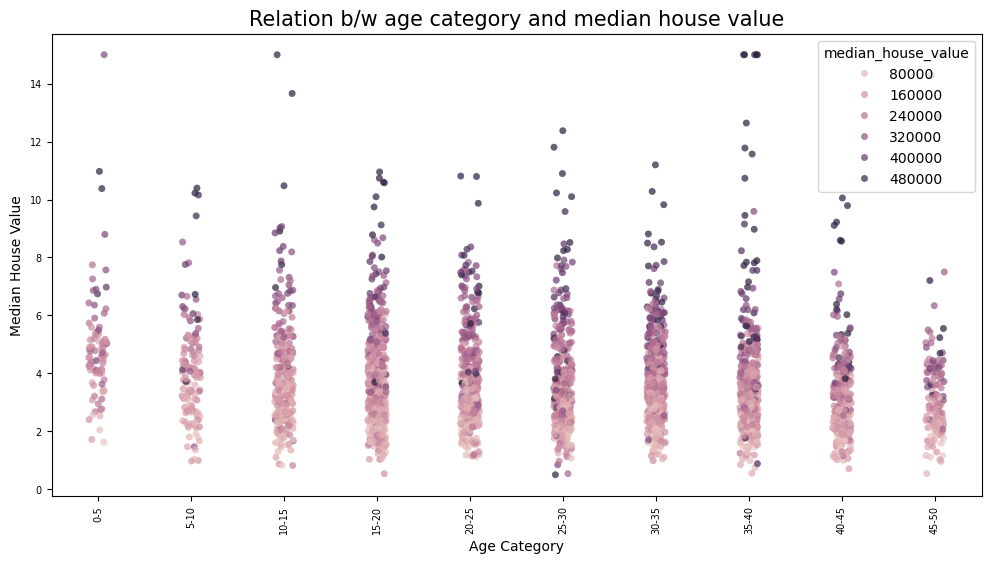

In [23]:
plt.figure(figsize=(12, 6))
sns.stripplot(data=house, x='age_category', hue='median_house_value', y='median_income', alpha=0.7)
plt.title('Relation b/w age category and median house value', fontsize=15)
plt.xlabel('Age Category')
plt.ylabel('Median House Value')
plt.xticks(rotation=90, fontsize=7)
plt.yticks(fontsize=7)
plt.show()

In [24]:
house.dtypes

longitude                float64
latitude                 float64
housing_median_age       float64
total_rooms              float64
total_bedrooms           float64
population               float64
households               float64
median_income            float64
median_house_value       float64
House_value_category    category
age_category            category
dtype: object

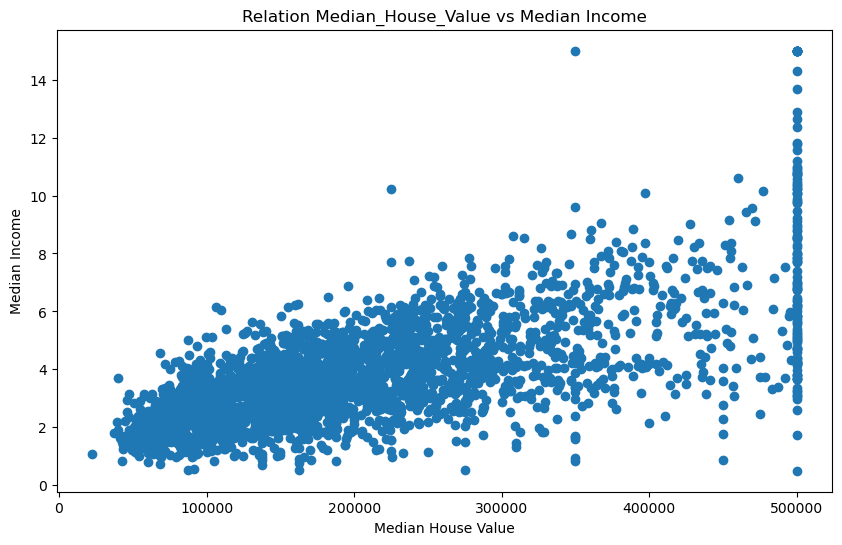

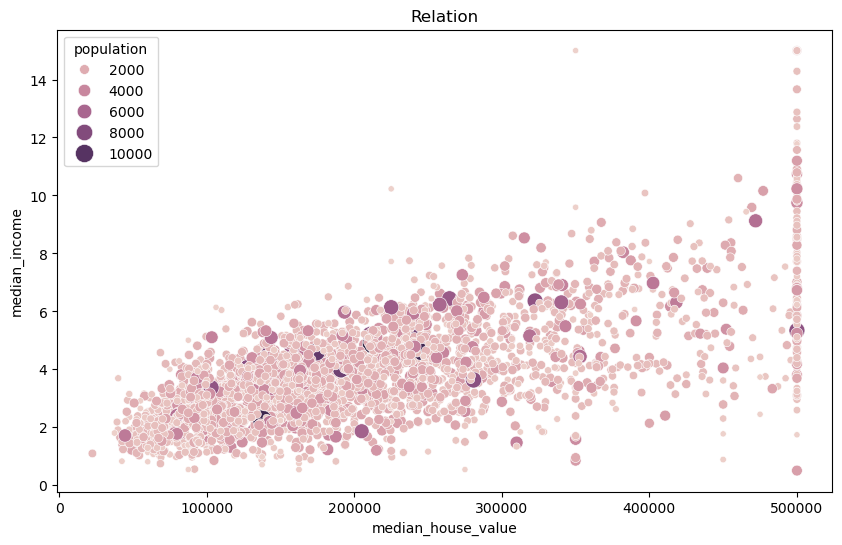

In [25]:

plt.figure(figsize=(10, 6))
plt.scatter(x=house['median_house_value'], y=house['median_income'])
plt.title('Relation Median_House_Value vs Median Income')
plt.xlabel('Median House Value')
plt.ylabel('Median Income')
plt.show()

plt.figure(figsize=(10, 6))
x=sns.scatterplot(x=house['median_house_value'], y=house['median_income'], hue=house['population'], size=house['population'], sizes=(20, 200))
x.set(title='Relation')
plt.show()

In [29]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'House_value_category', 'age_category'],
      dtype='object')

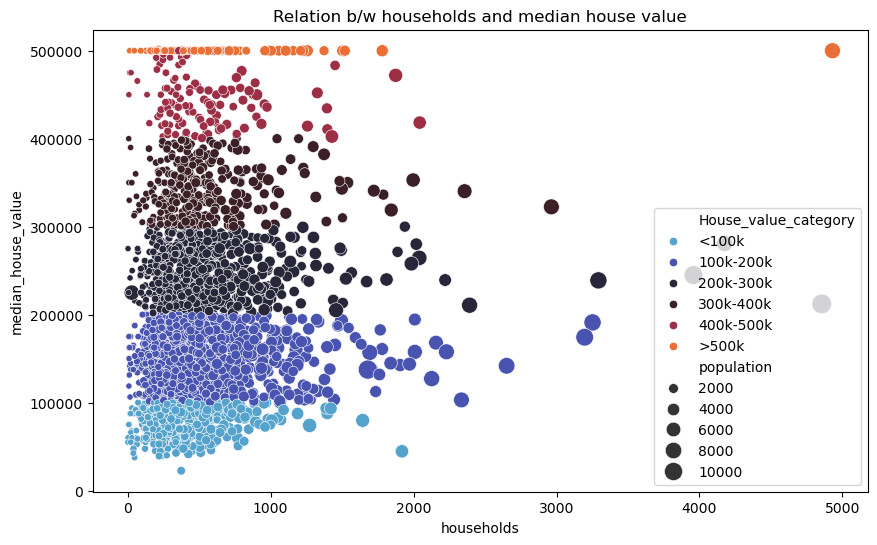

In [36]:
# Visualize the relationship b/w median house value and households and colored by house value category



plt.figure(figsize=(10, 6))
sns.scatterplot(data=house, x='households', y='median_house_value', hue='House_value_category', size='population', sizes=(20, 200), palette='icefire')
plt.title("Relation b/w households and median house value")
plt.show()

objective
valuable insights
recommendation
story telling
conclusion



Domain 
healthcare
travel/tourism/scm(supply chain tourism)
fintech / financial
b/s



code
visual
story telling